## Setup<div class='tocSkip'/>

Install required libraries.

In [1]:
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Vader Sentiment Analyser

In [4]:
analyser  = SentimentIntensityAnalyzer()

In [5]:
a = "This is a good movie."

In [6]:
analyser.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [7]:
b = "This was the best, most awesome movie EVER MADE!!!"

In [8]:
analyser.polarity_scores(b)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [9]:
c = " This was the WORST movie that has ever disgraced the screen."

In [10]:
analyser.polarity_scores(c)

{'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'compound': -0.8331}

In [11]:
import pandas as pd

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

file = "reviews.json.gz"
file = r"C:\Users\athar\Desktop\Everything\Dissertation\Sentiment analysis\Final\final_code\data\reviews.json.gz" # location
df = pd.read_json(file, lines=True)
df = df.rename(columns={'reviewText': 'text'})

# Assigning a new [1,0] target class label based on the product rating
df['sentiment'] = 0
df.loc[df['overall'] > 3, 'sentiment'] = "pos"
df.loc[df['overall'] < 3, 'sentiment'] = "neg"

# Removing unecessary columns to keep the data simple 
df.drop(columns=[
    'reviewTime', 'unixReviewTime', 'reviewerID', 'summary', 'asin', 'overall', 'verified'],
        inplace=True)
df.sample(10)

,text,sentiment
105716,These are awfully expensive for that amount I have to use in my coffee to even get any flavor out of them....,neg
123081,did not germinate,neg
42198,Real small,neg
143174,All of the icing was missing from the poptarts.,neg
120286,"The color cartridge worked, the black didn't...50% is ok, but not great.",neg
184347,it is very good.fast and excellent,pos
225295,It works wonder and my son loves it too.,pos
185167,Have not used it yet but the build is very nice.,pos
203041,Great song!,pos
263859,this is great ink for our printer it does the job and last for a long time and it came at a great price you just can't beat amazon,pos


In [13]:
df['sentiment'].value_counts()

pos    150000
neg    144240
Name: sentiment, dtype: int64

In [14]:
analyser.polarity_scores(df.iloc[0]['text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
df.iloc[0]['text']

'Waaaay too BIG'

In [16]:
df['scores'] = df['text'].apply(lambda review: analyser.polarity_scores(review))

In [17]:
df.sample(10)

,text,sentiment,scores
286067,good product,pos,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}"
12850,"Gauge was over 5 psi off in accuracy (low), and the bleeder valve was too slow to be of any use.",neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
162081,"yummy, just a little too sweet for my taste otherwise really great.",pos,"{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8889}"
139332,Poured entire bottle in 6 person hot tub over course of a couple weeks and still ph is way off,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
25399,"Awesome brightness from lights however the screw that hold light mount to its base is way too short to hold it in place, so if you mount these on your forks there;s a good chance of them getting caught in the forks when they fall off.",neg,"{'neg': 0.026, 'neu': 0.755, 'pos': 0.219, 'compound': 0.8807}"
53306,"It was described as ""The multifunctional, portable and user-friendly device allows you to wirelessly transfer photos, music, movies and other files from an SD card and USB storage device to iOS, Android and Windows smartphones/tablets""... well not true NO downloadable application available for windows smartphones ..",neg,"{'neg': 0.047, 'neu': 0.862, 'pos': 0.091, 'compound': 0.2956}"
177290,Just as described,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
28362,Could notbgetbthese to deal.,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
235250,FITS LIKE GLOVE i like the style of this case different and creative hard case protects my phone as it should dropped my phone 5x and this protected it everytime,pos,"{'neg': 0.036, 'neu': 0.594, 'pos': 0.37, 'compound': 0.9171}"
247870,"- Small footprint\n- Useful dial, maybe could add more dials\n- Obvious ON light\n- Stays on after power outtage\n- Zero coloring of the sound (unlike Joyo unit)\n- Comes loaded with nice Room reverb and reasonable tails, I left it as stock\n- Low power consumption, could battery power with a little cable\n- Super strong housing\n- Full customization, though I didn't even need to use it",pos,"{'neg': 0.031, 'neu': 0.789, 'pos': 0.181, 'compound': 0.8822}"


In [18]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [19]:
df.sample(10)

,text,sentiment,scores,compound
173122,Really nice and rich looking wallet case!,pos,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.8047}",0.8047
153601,I like these cables,pos,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}",0.3612
253300,Love this song!,pos,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}",0.6696
283699,good,pos,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}",0.4404
275663,"this piece fits on the battery on your car/truck/bike and connects to cable from battery tender, have this on all my equipt,toys for quick hook up.",pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
216468,Great fir protecting my Bluetooth,pos,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}",0.6249
281555,It's awesome original Samsung case and a hell of a lot cheaper then when I bought it from Samsung itself.,pos,"{'neg': 0.184, 'neu': 0.56, 'pos': 0.256, 'compound': 0.2023}",0.2023
108424,Horrible.,neg,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}",-0.5423
51904,too bulky,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
188278,No problems,pos,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}",-0.5994


In [20]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score>=0 else 'neg')

In [21]:
df.sample(10)

,text,sentiment,scores,compound,comp_score
31640,NOT BRIGHT AS SUGGESTED,neg,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}",-0.3412,neg
268286,OK,pos,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}",0.2960,pos
141282,"Arrived in great condition and thrives, but there's absolutely ZERO scent.",neg,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.3716}",0.3716,pos
6265,Too small and over priced.,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
4046,"Arrived on time, clear glass heads on the pins were not shiny enough, did not serve the purpose.",neg,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3818}",0.3818,pos
252794,Probably one of the best baking powders out there.,pos,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}",0.6369,pos
3334,these came all curls up---I had to iron them to use and get them straight--will not order again,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
65739,Sim is not working well,neg,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'compound': -0.2057}",-0.2057,neg
266013,Worked great,pos,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}",0.6249,pos
247464,Works perfect with my Yamaha R6.,pos,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}",0.5719,pos


In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
print(accuracy_score(df['sentiment'],df['comp_score']))

0.7067359978249048


In [24]:
print(classification_report(df['sentiment'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.93      0.44      0.59    144240
         pos       0.64      0.97      0.77    150000

    accuracy                           0.71    294240
   macro avg       0.78      0.70      0.68    294240
weighted avg       0.78      0.71      0.68    294240



In [25]:
print(confusion_matrix(df['sentiment'],df['comp_score']))

[[ 62810  81430]
 [  4860 145140]]


# Naive Bayes Classifier

In [26]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

file = "reviews.json.gz"
file = r"C:\Users\athar\Desktop\Everything\Dissertation\Sentiment analysis\Final\final_code\data\reviews.json.gz" # location
df = pd.read_json(file, lines=True)
df = df.rename(columns={'reviewText': 'text'})

# Assigning a new [1,0] target class label based on the product rating
df['sentiment'] = 0
df.loc[df['overall'] > 3, 'sentiment'] = 1
df.loc[df['overall'] < 3, 'sentiment'] = 0

# Removing unecessary columns to keep a simple dataframe 
df.drop(columns=[
    'reviewTime', 'unixReviewTime', 'reviewerID', 'summary', 'overall', 'asin', 'verified'],
        inplace=True)
df.sample(20)

,text,sentiment
151788,Fits well under the rear seat of my 17 F350.,1
245401,Nice product,1
283730,"Phone is great, only problem is it that I just about get a full day on the battery ( with only minimal use).",1
223774,best way to keep a wheel barrow from rusting out at the lip!,1
196527,my friend likes it,1
284666,PB & chocolate........ Just add a glass of mikk,1
278564,received as committed and expected,1
273125,"perfect, good price, and easily reordered",1
57103,Broke nevee work and I could not send it back I never used it,0
106544,Doesn't hold the liquid,0


In [28]:
with open('./contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [29]:
review_data = df.columns.values[0]
sentiment = df.columns.values[1]
review_data, sentiment

('text', 'sentiment')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294240 entries, 0 to 294239
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       294240 non-null  object
 1   sentiment  294240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ MB


In [31]:
def emoji(review_data):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    review_data = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', review_data)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    review_data = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', review_data)
    # Love -- <3, :*
    review_data = re.sub(r'(<3|:\*)', ' positiveemoji ', review_data)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    review_data = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', review_data)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    review_data = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', review_data)
    # Cry -- :,(, :'(, :"(
    review_data = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', review_data)
    return review_data

In [32]:
import re

def process_review_data(review_data):
    review_data = review_data.lower()                                             # Lowercases the string
    review_data = re.sub('@[^\s]+', '', review_data)                              # Removes usernames
    review_data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review_data)   # Remove URLs
    review_data = re.sub(r"\d+", " ", str(review_data))                           # Removes all digits
    review_data = re.sub('&quot;'," ", review_data)                               # Remove (&quot;) 
    review_data = emoji(review_data)                                              # Replaces Emojis
    review_data = re.sub(r"\b[a-zA-Z]\b", "", str(review_data))                   # Removes all single characters
    for word in review_data.split():
        if word.lower() in contractions:
            review_data = review_data.replace(word, contractions[word.lower()])   # Replaces contractions
    review_data = re.sub(r"[^\w\s]", " ", str(review_data))                       # Removes all punctuations
    review_data = re.sub(r'(.)\1+', r'\1\1', review_data)                         # Convert more than 2 letter repetitions to 2
    review_data = re.sub(r"\s+", " ", str(review_data))                           # Replaces double spaces with single space    
    return review_data

In [33]:
df['processed_text'] = np.vectorize(process_review_data)(df[review_data])

In [34]:
df.sample(10)

,text,sentiment,processed_text
144678,Good product,1,good product
87903,"received box of hershey bars all new,wrapped, but they were stale [tasted awful] and only a few months from expire date....probably badly stored or they were just bought up by seller as old old stock and passed it on....Several different wrappers have been issued since this candy was wrapped....Bad buy........also they were much more expensive than my local super-market [they had been out of them] and they only cost $1.00 each at the market NOW with newer wrappers...mailed the seller----they ignored email and never replied.......\n\n [[ASIN:B0014C0HBA Hershey's Milk Chocolate with Almond King Size 18 - 2.6oz Bars].Chocolate with Almond King Size 18 - 2.6oz Bars",0,received box of hershey bars all new wrapped but they were stale tasted awful and only few months from expire date probably badly stored or they were just bought up by seller as old old stock and passed it on several different wrappers have been issued since this candy was wrapped bad buy also they were much more expensive than my local super market they had been out of them and they only cost each at the market now with newer wrappers mailed the seller they ignored email and never replied asin hba hershey milk chocolate with almond king size oz bars chocolate with almond king size oz bars
25643,Didn't fit my car as indicated it would by amazon and the manufacturer.,0,didn fit my car as indicated it would by amazon and the manufacturer
156060,Good product,1,good product
223560,Were perfect i like design and worked perfect.,1,were perfect like design and worked perfect
213409,Heavy duty that is for sure!,1,heavy duty that is for sure
161436,works as described bigger and longer blooms.,1,works as described bigger and longer blooms
125534,Not as sturdy as I thought it would be.,0,not as sturdy as thought it would be
113088,"the ink from these bubbles all over hte page, and smears badly",0,the ink from these bubbles all over hte page and smears badly
278770,"Super bright, built solid",1,super bright built solid


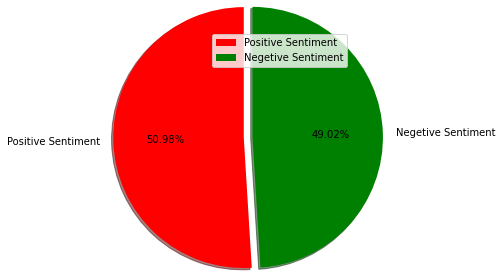

In [35]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment']

slices = [(df[sentiment] != 0).sum(), (df[sentiment] == 0).sum()] 
colors = ['r', 'g'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

<Figure size 3600x2400 with 0 Axes>

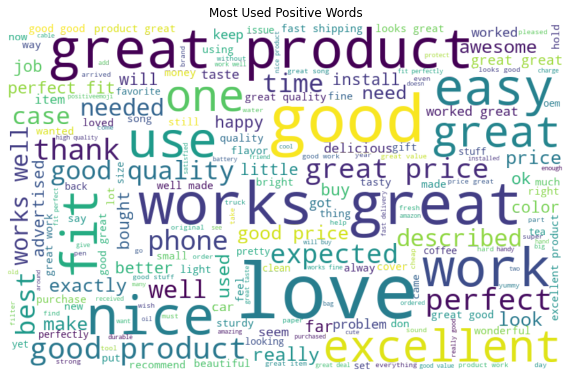

In [36]:
positive_words =' '.join([text for text in df['processed_text'][df[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('./positive_words.png')
plt.show()

<Figure size 3600x2400 with 0 Axes>

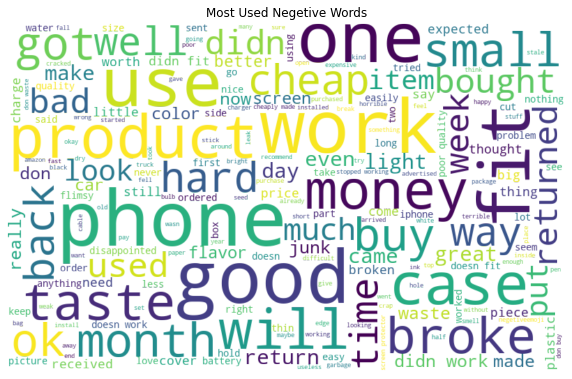

In [37]:
negetive_words =' '.join([text for text in df['processed_text'][df[sentiment] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('./negetive_words.png')
plt.show()

In [38]:
#  from sklearn.feature_extraction.text import CountVectorizer

#  count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
#  final_vectorized_data = count_vectorizer.fit_transform(df['processed_text'])  
#  final_vectorized_data

<294240x546386 sparse matrix of type '<class 'numpy.int64'>'
	with 4745491 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(df['processed_text'])

final_vectorized_data

<294240x1752308 sparse matrix of type '<class 'numpy.float64'>'
	with 6815738 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df[sentiment],
                                                    test_size=0.2, random_state=69)

In [48]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (235392, 1752308)
X_test_shape :  (58848, 1752308)
y_train_shape :  (235392,)
y_test_shape :  (58848,)


In [49]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

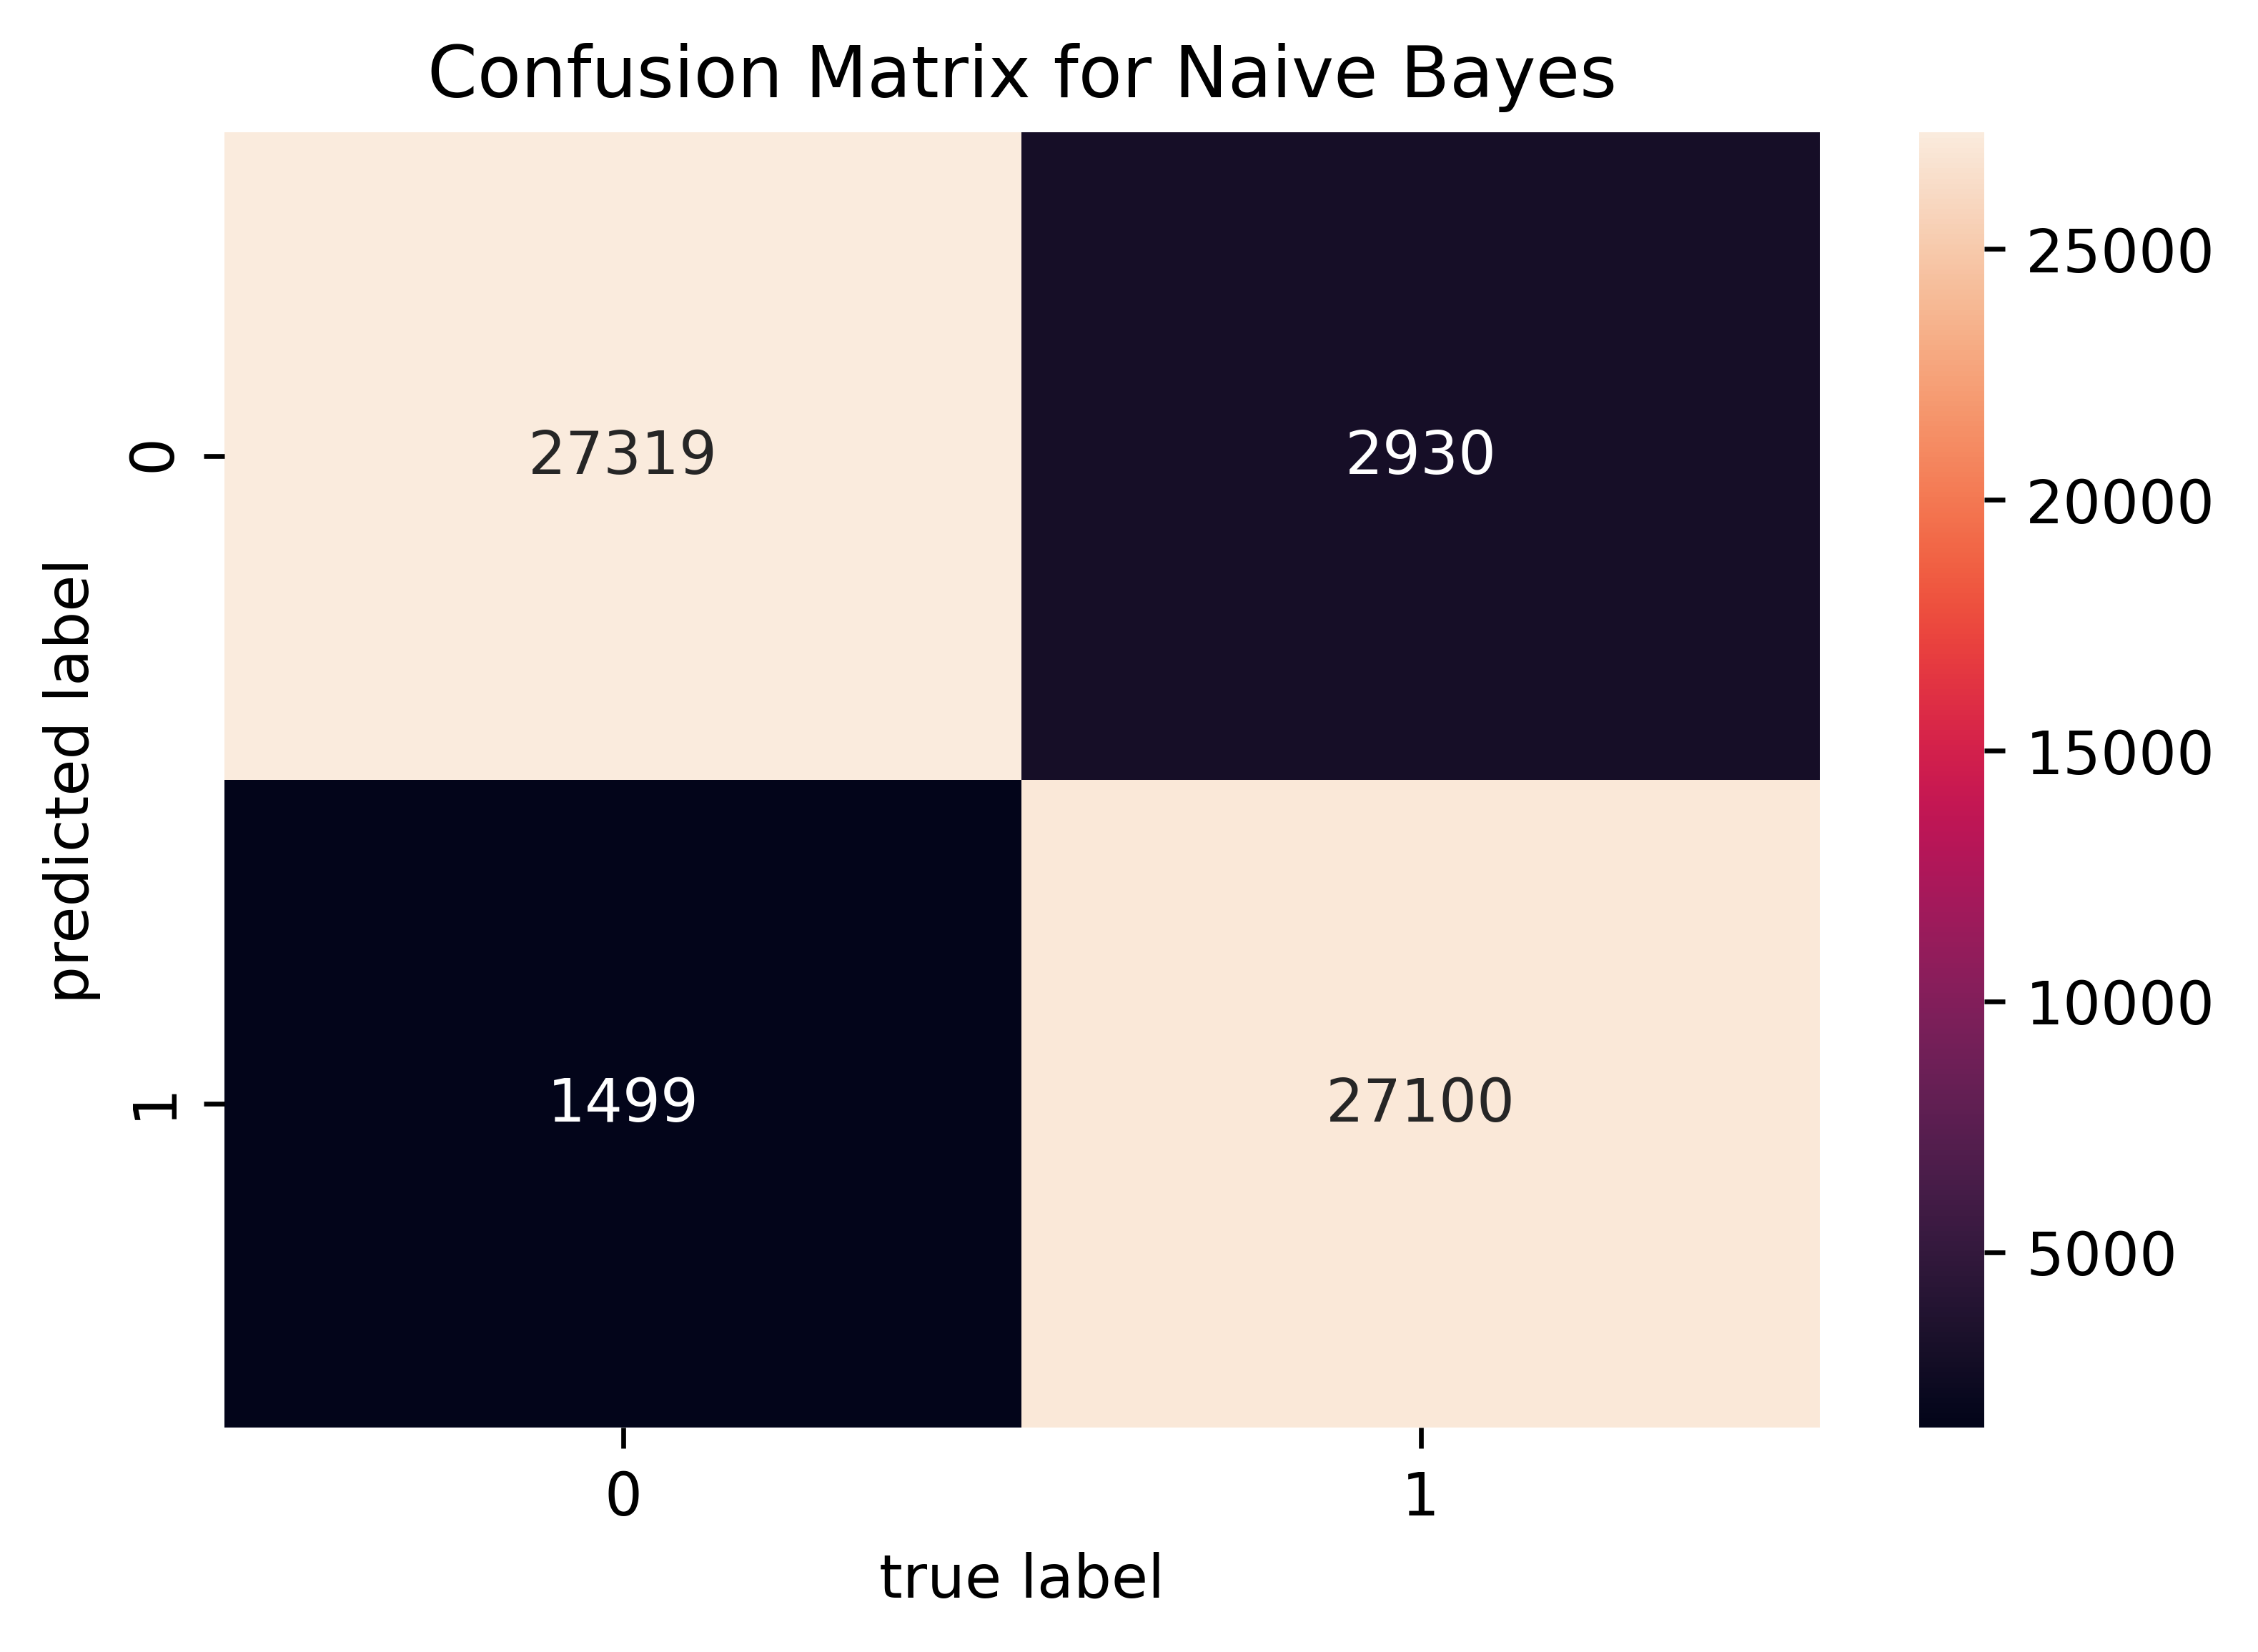

In [50]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=True)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("./confusion_matrix.png")
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9247383088635128


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     28818
           1       0.95      0.90      0.92     30030

    accuracy                           0.92     58848
   macro avg       0.93      0.93      0.92     58848
weighted avg       0.93      0.92      0.92     58848



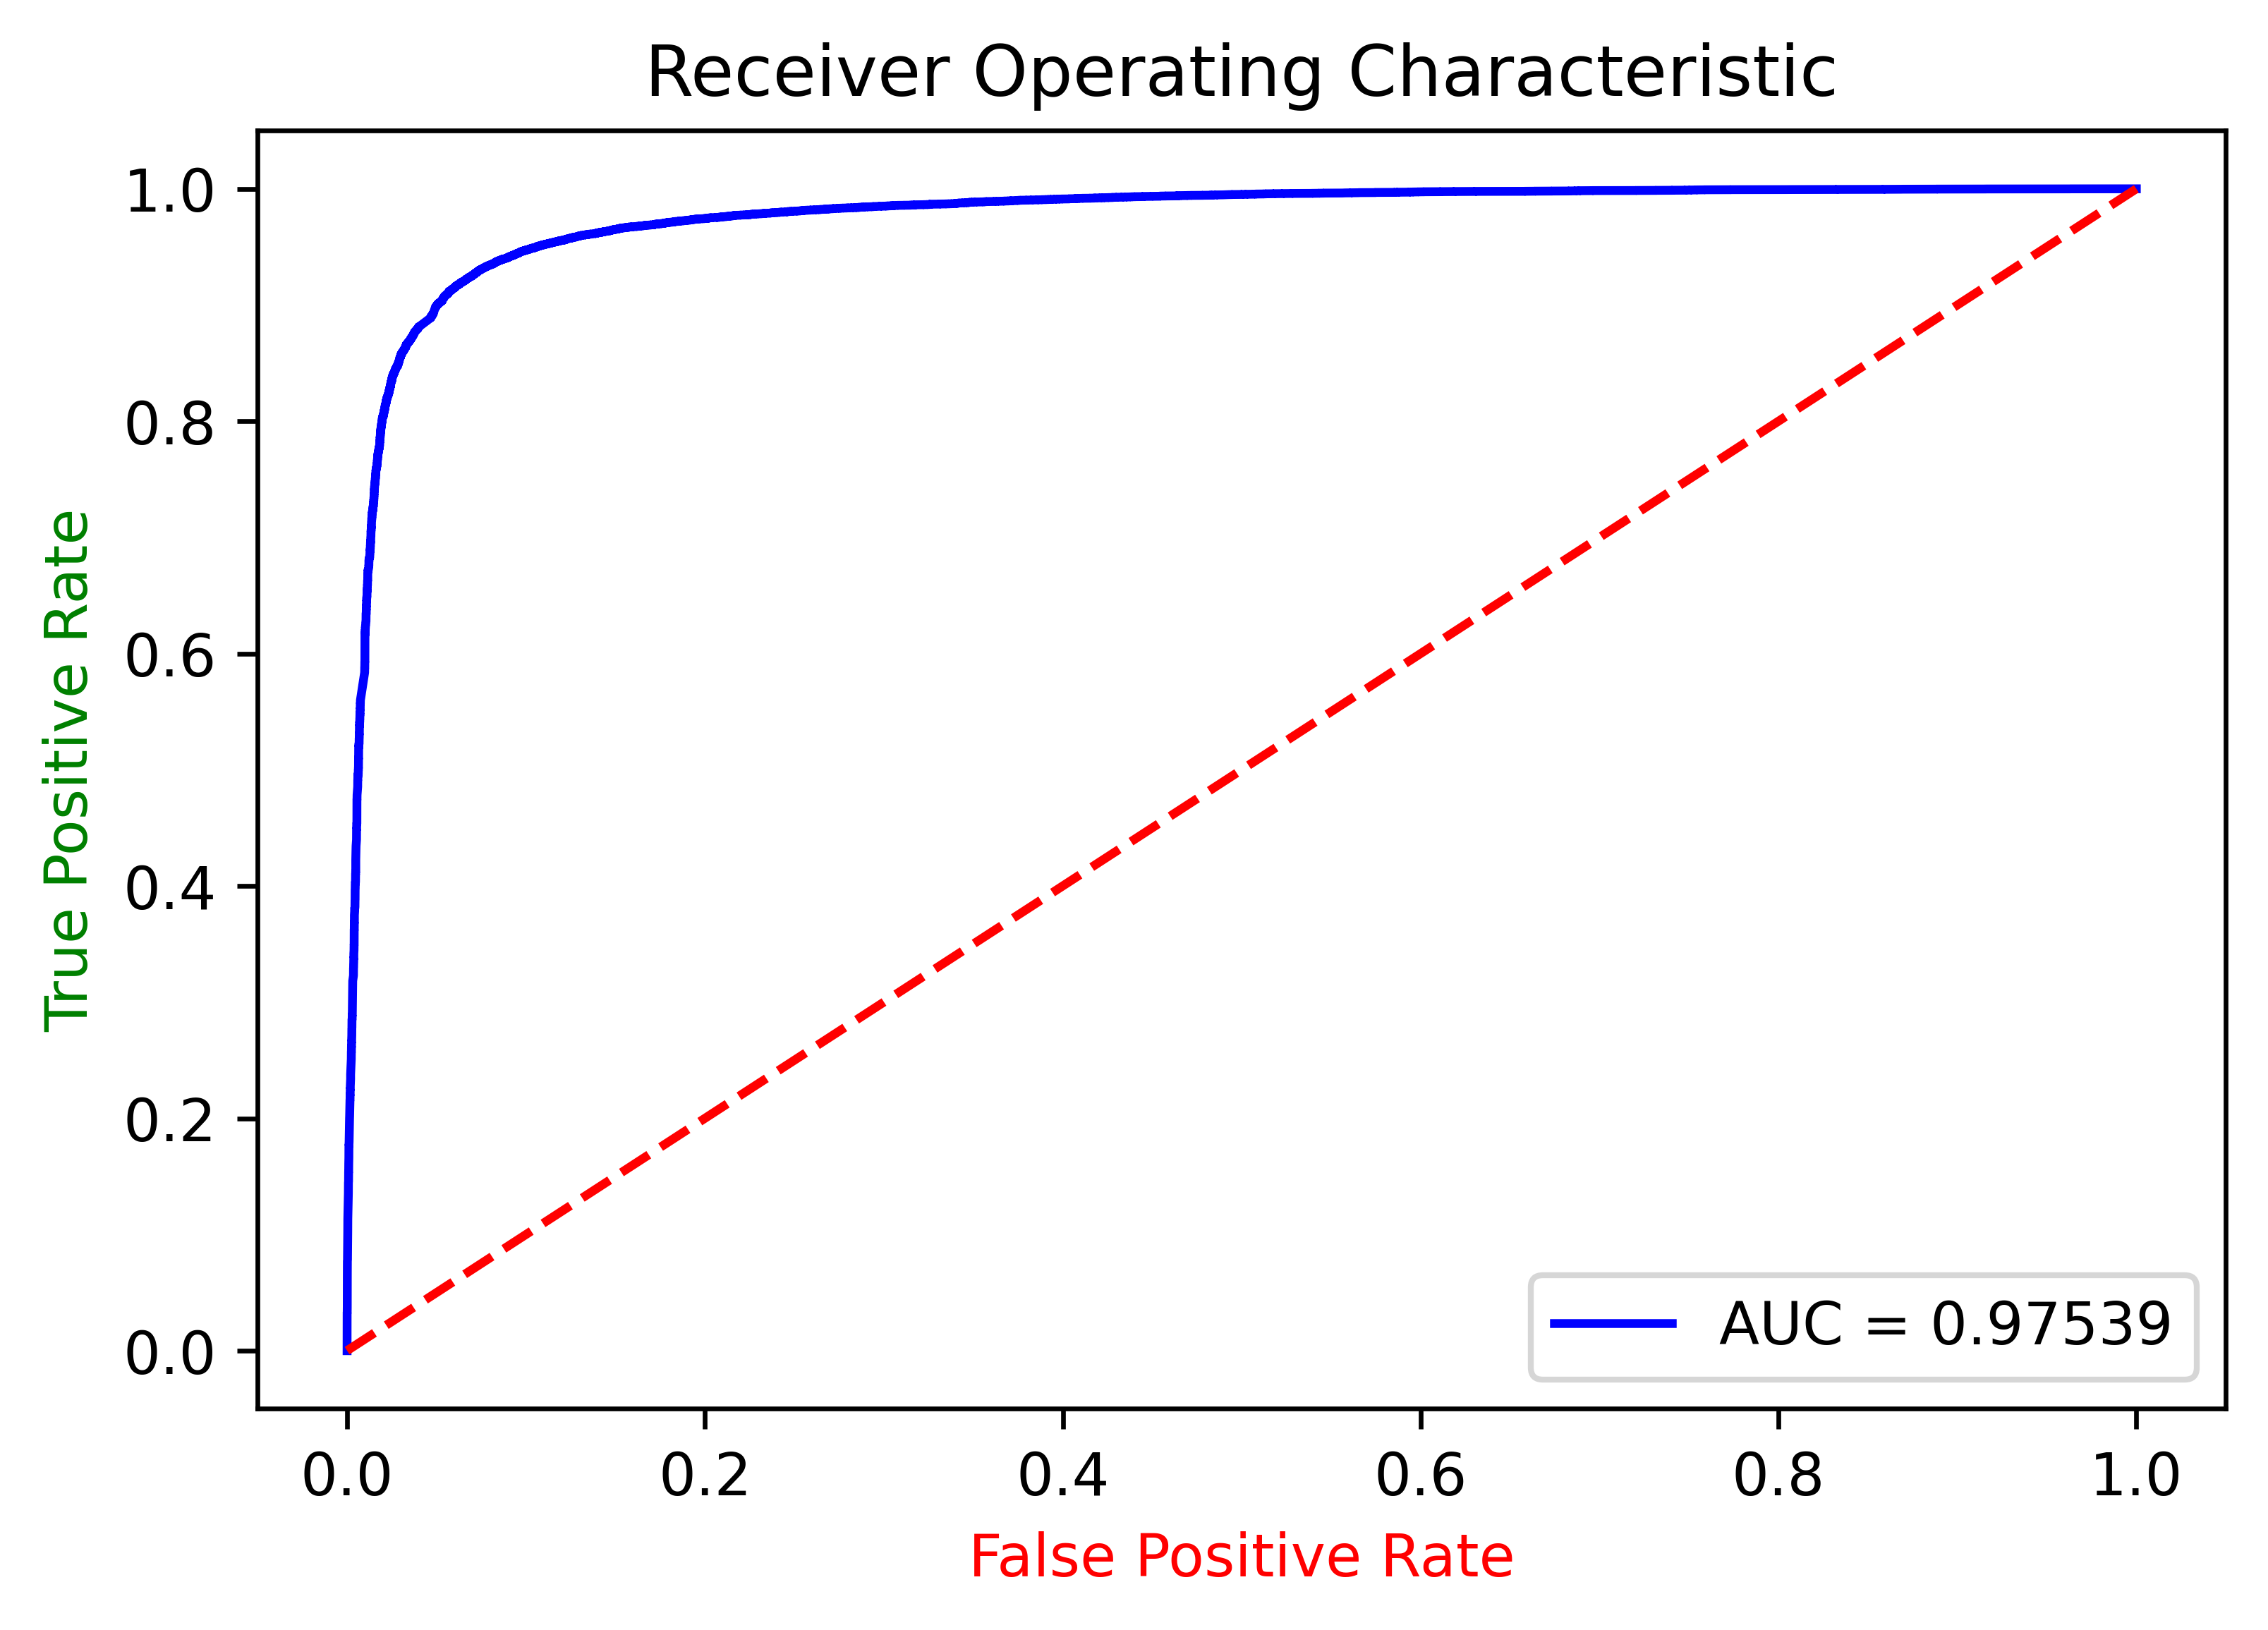

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.savefig("./ROC_curve.png")
plt.show()